# Installing Packages

In [1]:
!pip install xgboost
!pip install prophet
!pip install keras
!pip install tensorflow
!pip install --upgrade statsmodels

# Load The Libraries

In [2]:
import pandas as pd
import acndata_utils
import Optimization_utils
import pandas as pd
import StationData_utils
import StationForecast_utils

# Load The INPUT DATA

In [3]:
dfs = []
for file_path in [
    "acndata_sessions_JPL.json",
    "acndata_sessions_Caltech.json",
    "acndata_sessions_Office_1.json"
]:
    df = acndata_utils.getdf(file_path)
    if df is not None:
        dfs.append(df)
    else:
        print(f"Warning: {file_path} could not be processed and will be skipped.")

Error loading JSON data: Expecting value: line 263987 column 3 (char 8718576)
Error Occured at file:  acndata_sessions_JPL.json
Attempting to repair and parse the JSON file...
JSON parsed successfully!


# Concat and sort all dataframes to get whole new data

In [4]:
if dfs:
    df = pd.concat(dfs).sort_values(by="_id").reset_index(drop=True)
    df = df.drop(columns=['_id'])
    # Add new '_id' column as index_number
    df.reset_index(inplace=True)
    df.rename(columns={'index': '_id'}, inplace=True)
    df = acndata_utils.clean_acndata(df)
    print(df.shape)
else:
    print("No valid data available to process.")

(17902, 14)


## Save the data as 'acndata.csv'. This is our user data

In [5]:
df.to_csv("acndata.csv", index=False)

# Converting Data to Station Data

In [26]:
df_new = StationData_utils.analyze_hourly_sessions(df)

In [27]:
df_new.head()

date      session       session_start         session_end clusterID  \
0  2019-10-10  00:00-01:00 2019-10-10 00:00:00 2019-10-10 01:00:00      0039   
1  2019-10-10  00:00-01:00 2019-10-10 00:00:00 2019-10-10 01:00:00      0001   
2  2019-10-10  01:00-02:00 2019-10-10 01:00:00 2019-10-10 02:00:00      0039   
3  2019-10-10  01:00-02:00 2019-10-10 01:00:00 2019-10-10 02:00:00      0039   
4  2019-10-10  01:00-02:00 2019-10-10 01:00:00 2019-10-10 02:00:00      0039   

  siteID    stationID  chargingUsers  standbyUsers  Average_Power  
0   0002  2-39-78-363              2             0       3.114126  
1   0001  1-1-193-829              2             0       3.114126  
2   0002  2-39-78-363              5             1       2.904013  
3   0002  2-39-131-30              5             1       2.904013  
4   0002  2-39-129-17              5             1       2.904013

## Convert to csv to store our data as 'stationdata.csv' this is our station data.

In [29]:
df_new.to_csv("stationdata.csv",index=False)

### Plotting Data

In [12]:
StationData_utils.create_interactive_plot(df_new)

interactive(children=(Dropdown(description='selected_date', options=(datetime.date(2019, 10, 10), datetime.dat…

# Aggregating the station data

In [30]:
df_new = df_new.groupby('date').agg({
    'Average_Power': 'mean',
    'chargingUsers': 'sum',
    'standbyUsers': 'sum'
}).reset_index()
df_new.set_index('date', inplace=True)

# Making Target Columns Numeric

In [31]:
columns_to_check = ['Average_Power', 'chargingUsers', 'standbyUsers']
existing_columns = [col for col in columns_to_check if col in df_new.columns]

df_new[existing_columns] = df_new[existing_columns].apply(pd.to_numeric, errors='coerce')
df_new = df_new.dropna()

# Forecasting and plotting charts using ARIMA, SARIMAX, Prophet, Random Forest, Decision Tree, XGBoost and LSTM

Running models for Average_Power...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqog26d1/yhyu6i29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqog26d1/vjfztaku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86300', 'data', 'file=/tmp/tmppqog26d1/yhyu6i29.json', 'init=/tmp/tmppqog26d1/vjfztaku.json', 'output', 'file=/tmp/tmppqog26d1/prophet_model39_xnodq/prophet_model-20241209191644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:16:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

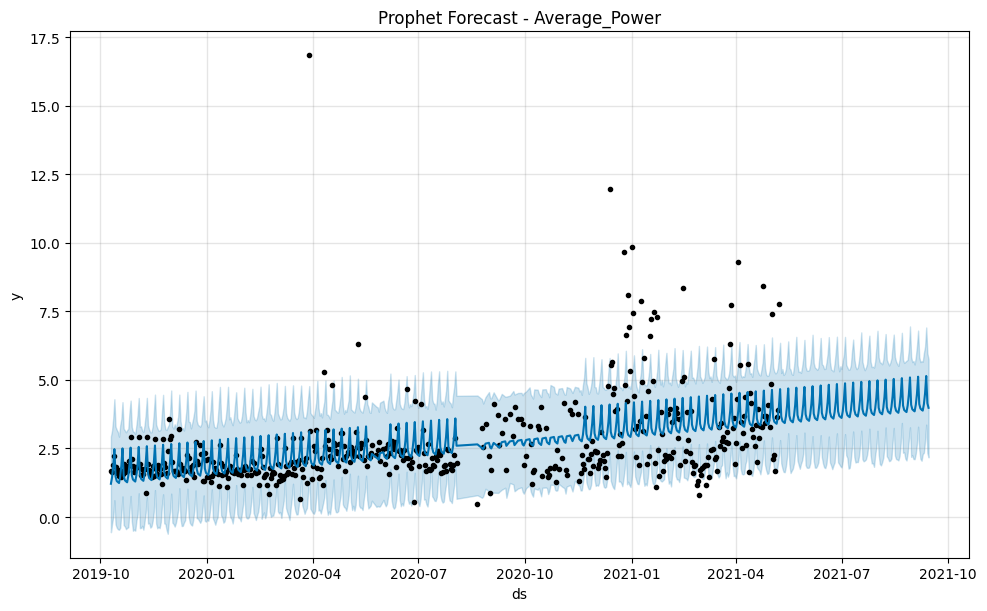

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

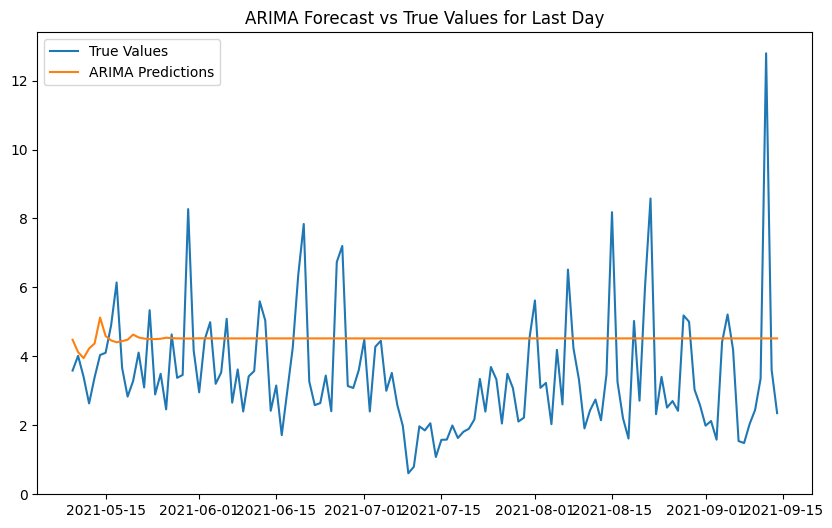

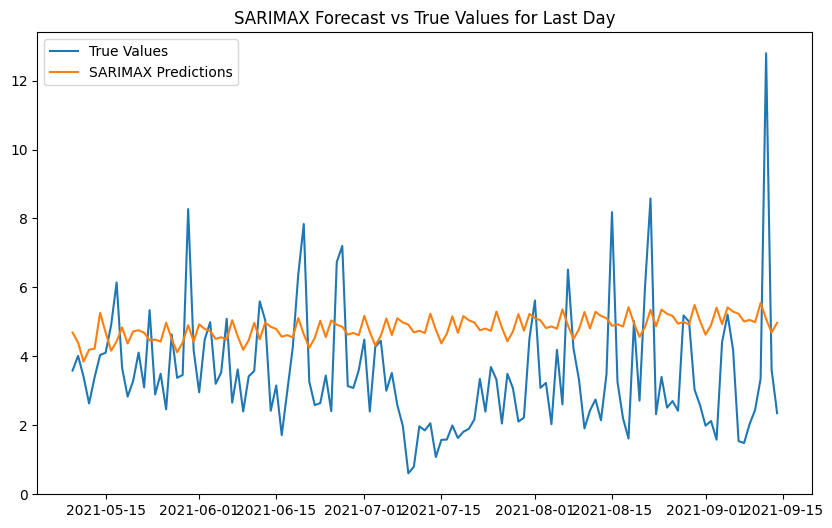

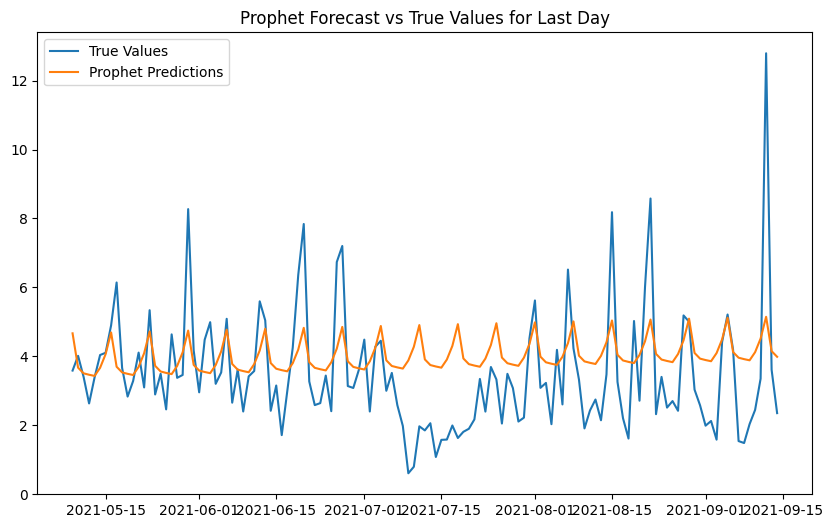

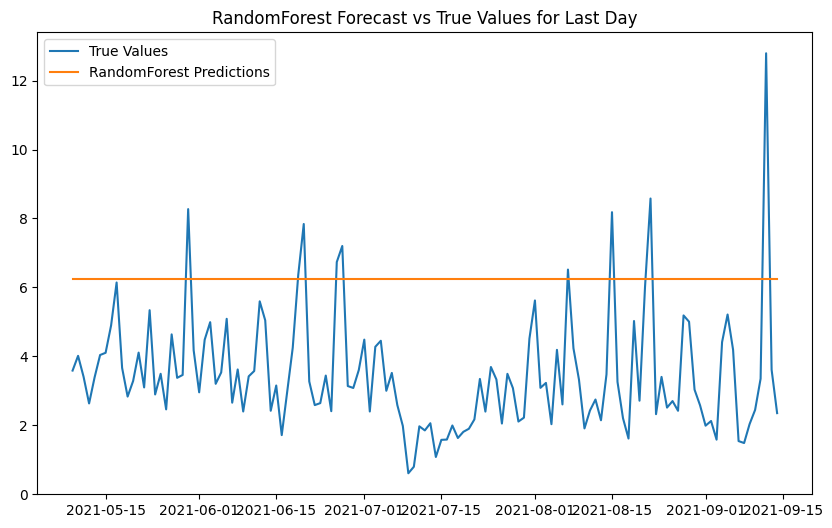

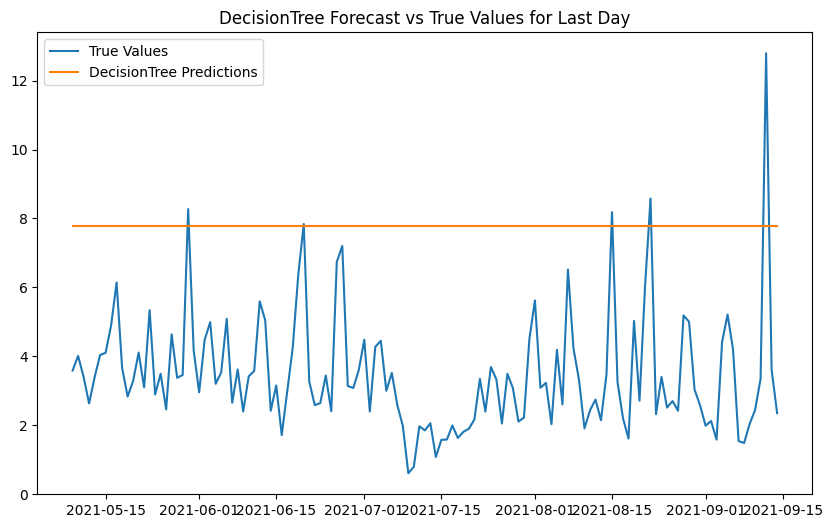

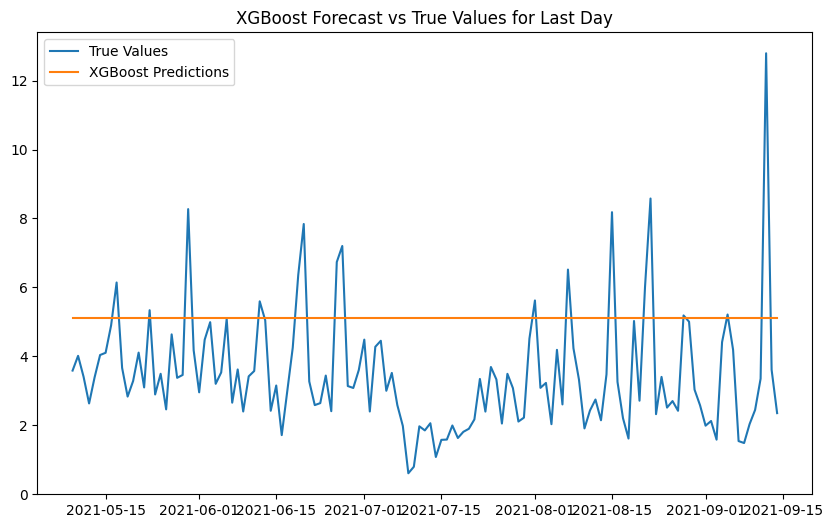

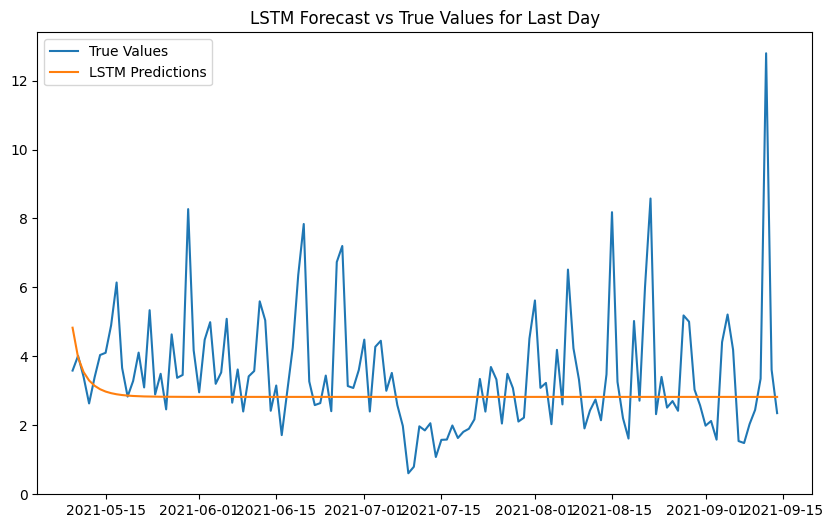

Running models for chargingUsers...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqog26d1/oxtmtxto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqog26d1/ogq6kczi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21918', 'data', 'file=/tmp/tmppqog26d1/oxtmtxto.json', 'init=/tmp/tmppqog26d1/ogq6kczi.json', 'output', 'file=/tmp/tmppqog26d1/prophet_model2r36r1bj/prophet_model-20241209191709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

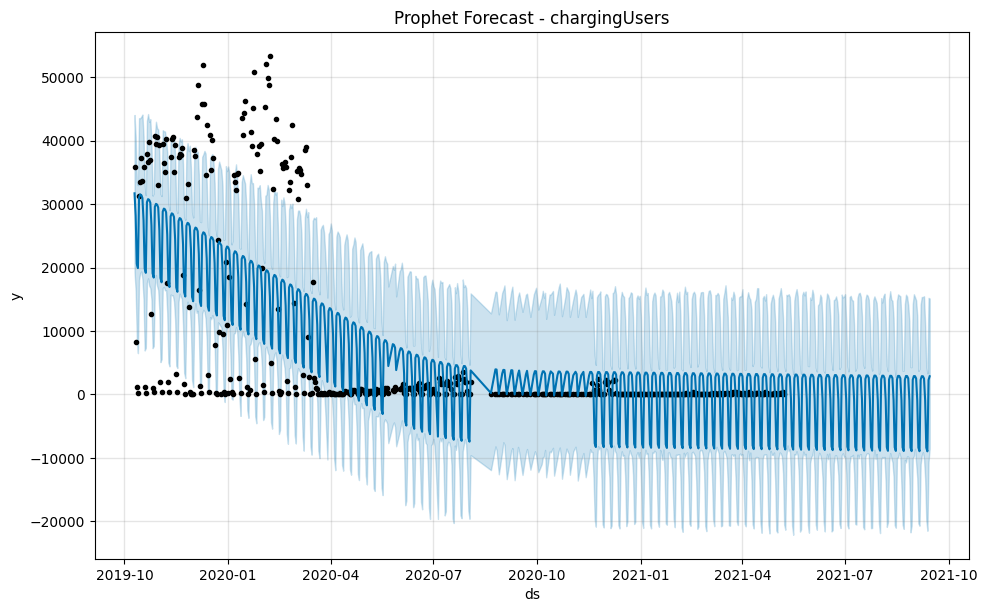

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━

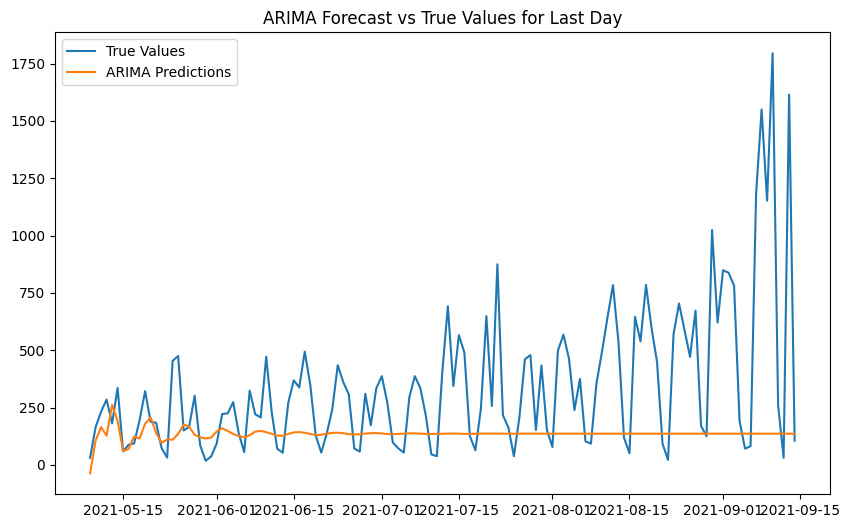

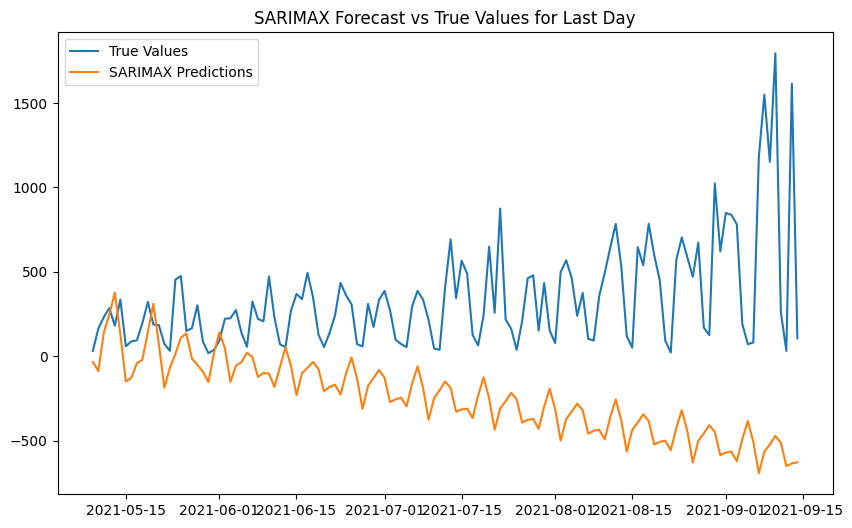

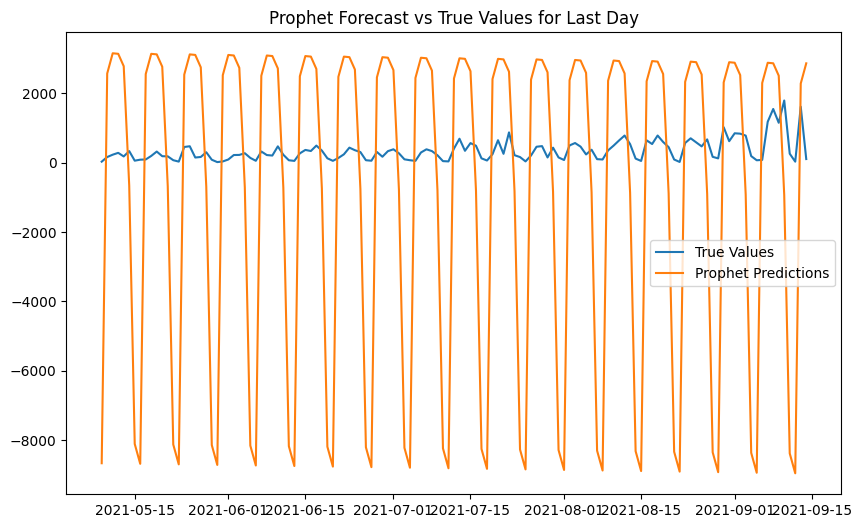

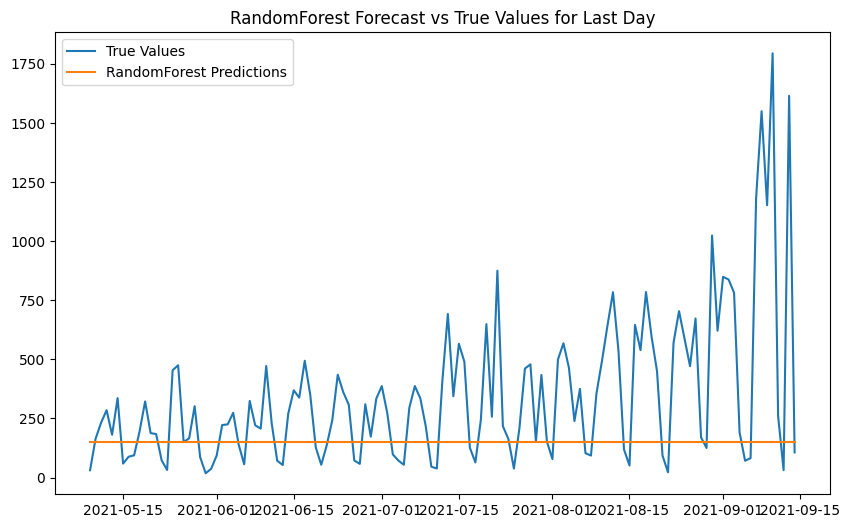

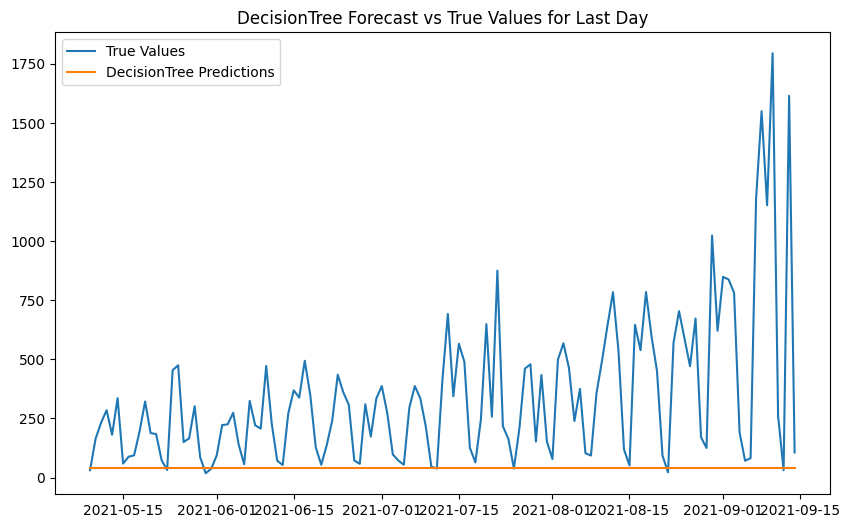

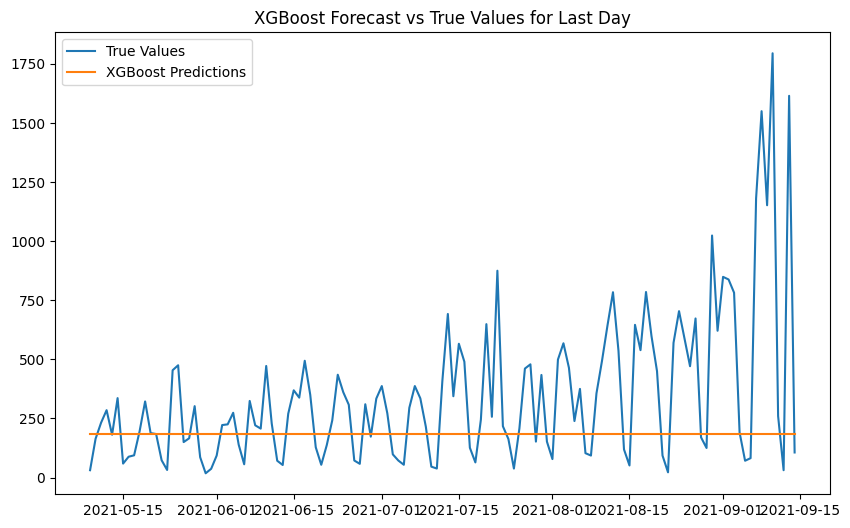

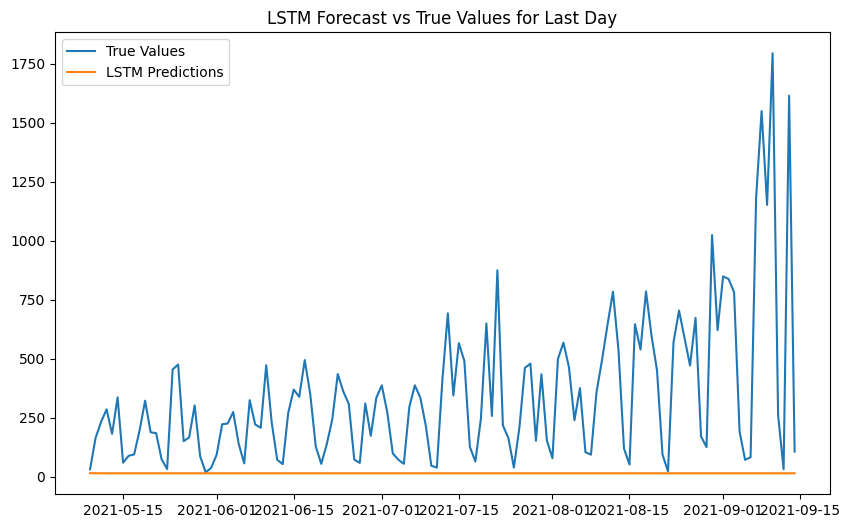

Running models for standbyUsers...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqog26d1/7lr9vnz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqog26d1/r6m3f_d8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86198', 'data', 'file=/tmp/tmppqog26d1/7lr9vnz8.json', 'init=/tmp/tmppqog26d1/r6m3f_d8.json', 'output', 'file=/tmp/tmppqog26d1/prophet_modeligqtcls9/prophet_model-20241209191735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

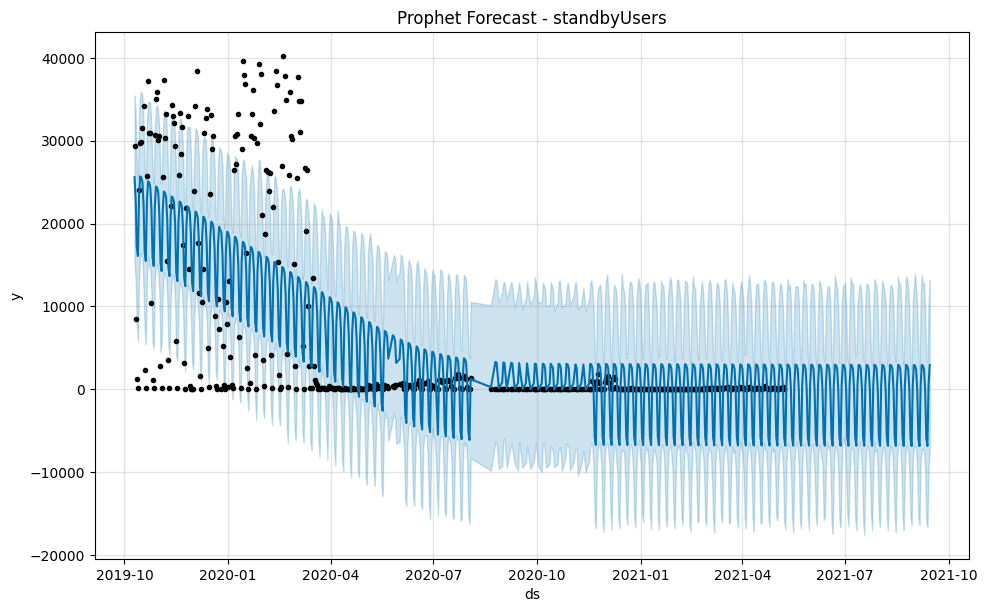

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━

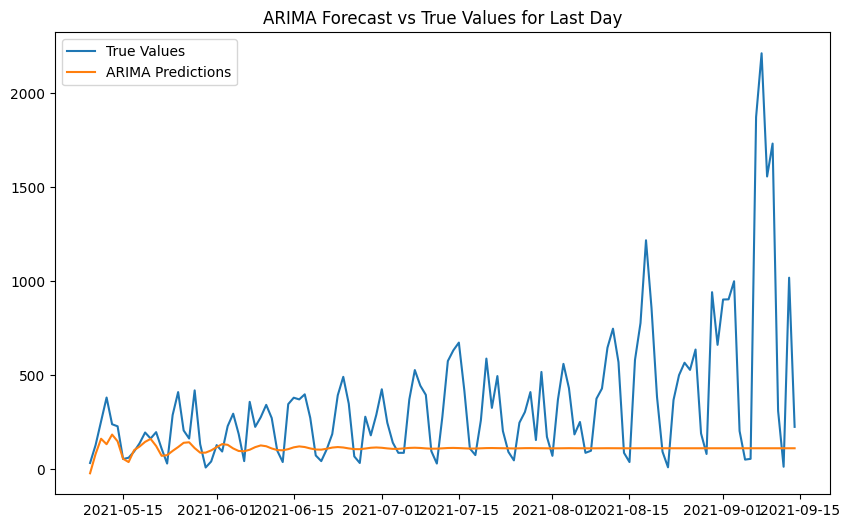

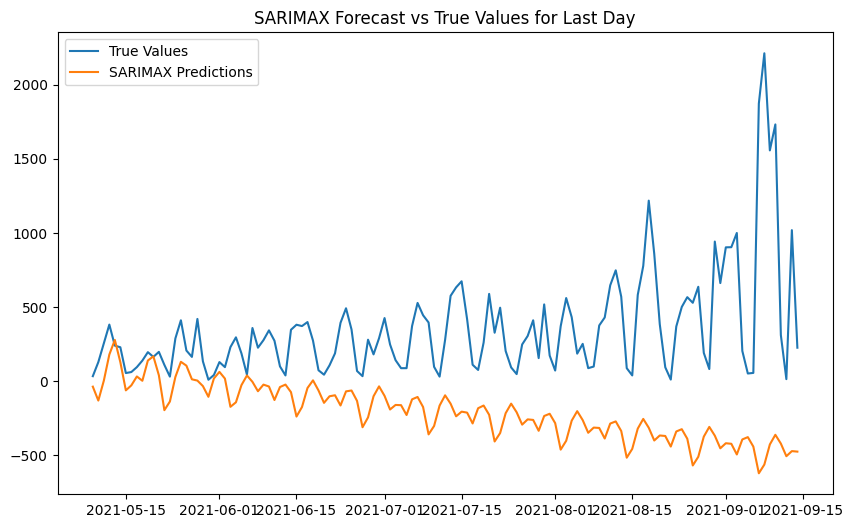

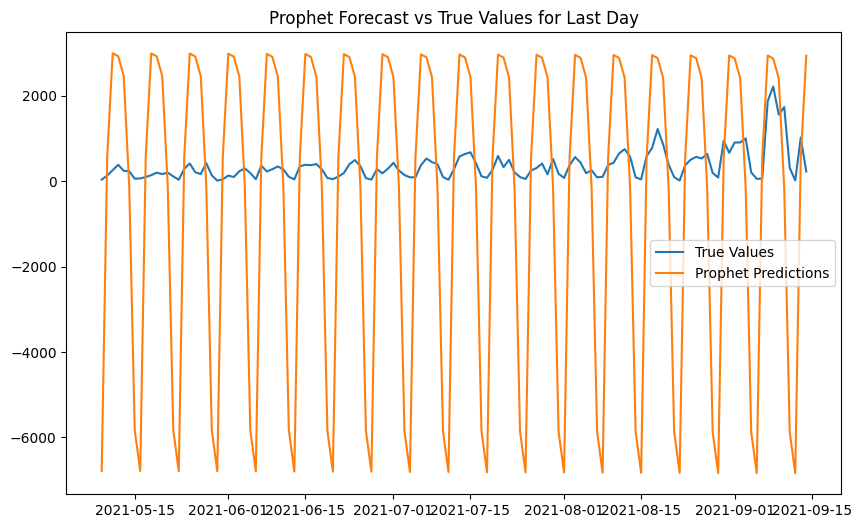

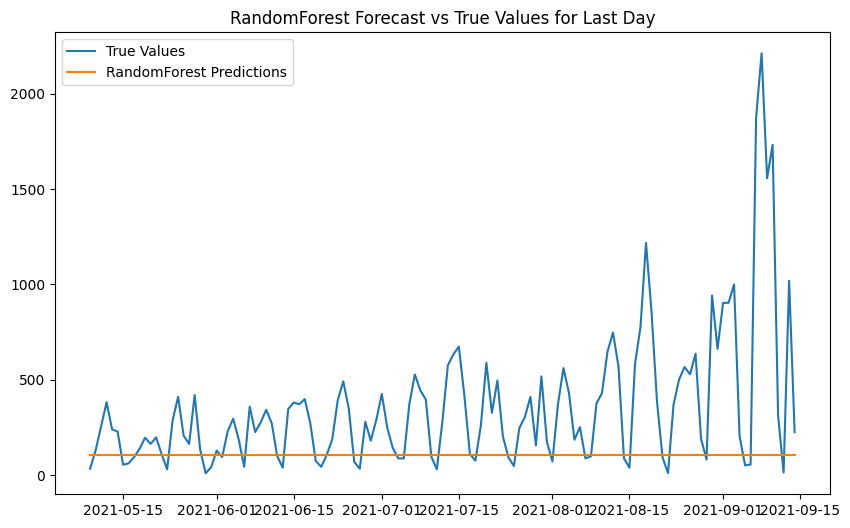

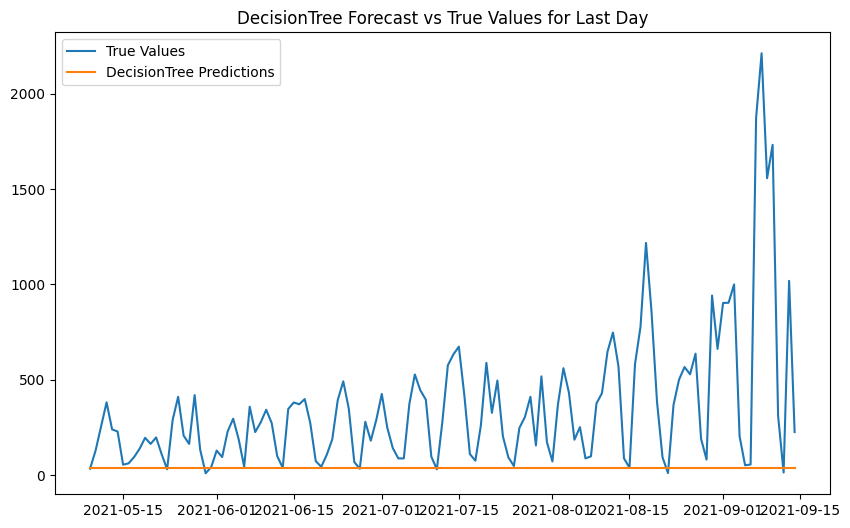

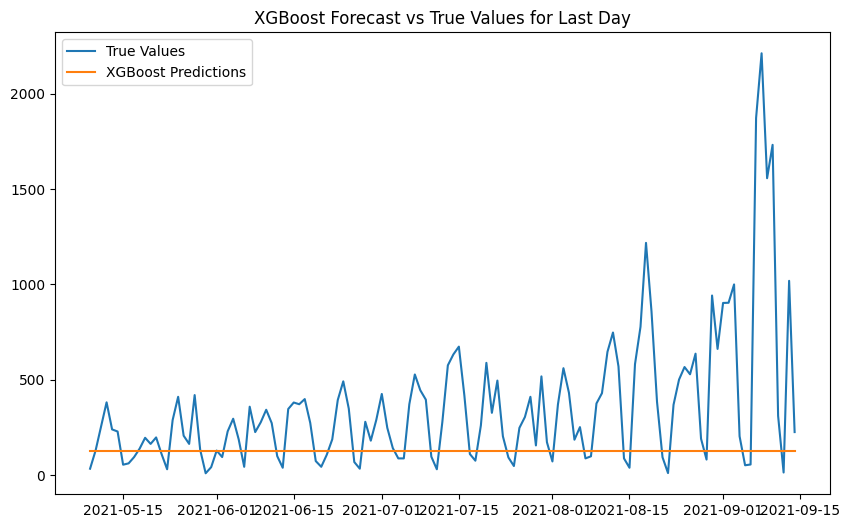

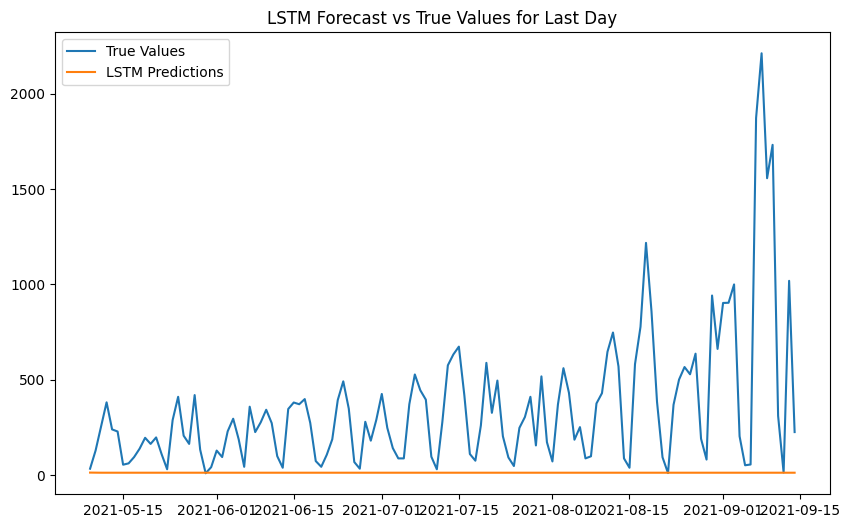

In [16]:
for column in ['Average_Power', 'chargingUsers', 'standbyUsers']:
    train, test = StationForecast_utils.Train_Test(df_new, column)
    print(f"Running models for {column}...")

    arima_preds = StationForecast_utils.arima_forecast(train, test)
    sarimax_preds = StationForecast_utils.sarimax_forecast(train, test)
    prophet_preds = StationForecast_utils.prophet_forecast(df_new,column)
    tree_preds_rf = StationForecast_utils.tree_based_forecast(train, test, "RandomForest")
    tree_preds_dt = StationForecast_utils.tree_based_forecast(train, test, "DecisionTree")
    tree_preds_xgb = StationForecast_utils.tree_based_forecast(train, test, "XGBoost")
    lstm_preds = StationForecast_utils.lstm_forecast(train, test)

    # Plot forecasts
    StationForecast_utils.plot_arima_forecast(train,test)
    StationForecast_utils.plot_sarimax_forecast(train,test)
    StationForecast_utils.plot_tree_based_forecast(train,test,model_name="RandomForest")
    StationForecast_utils.plot_tree_based_forecast(train, test, model_name="DecisionTree")
    StationForecast_utils.plot_tree_based_forecast(train, test, model_name="XGBoost")
    StationForecast_utils.plot_lstm_forecast(train,test)

    StationForecast_utils.plot_last_day_forecast(test, arima_preds, "ARIMA")
    StationForecast_utils.plot_last_day_forecast(test, sarimax_preds, "SARIMAX")
    StationForecast_utils.plot_last_day_forecast(test, prophet_preds, "Prophet")
    StationForecast_utils.plot_last_day_forecast(test, tree_preds_rf, "RandomForest")
    StationForecast_utils.plot_last_day_forecast(test, tree_preds_dt, "DecisionTree")
    StationForecast_utils.plot_last_day_forecast(test, tree_preds_xgb, "XGBoost")
    StationForecast_utils.plot_last_day_forecast(test, lstm_preds, "LSTM")

# What is the seasonal charging behavior of EV charging vehicles?

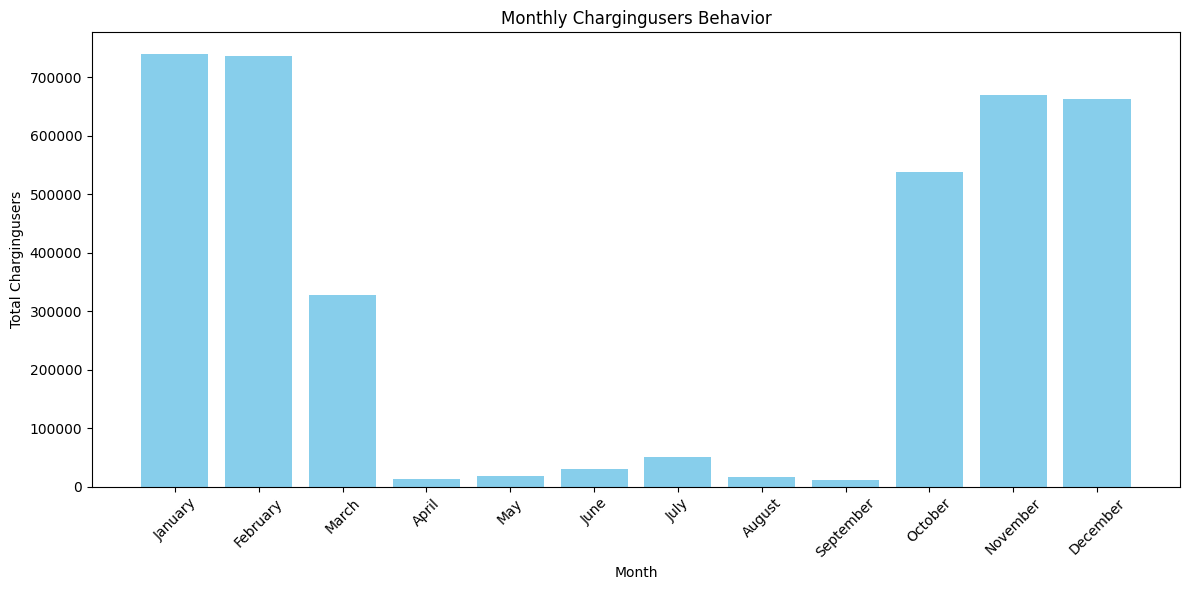

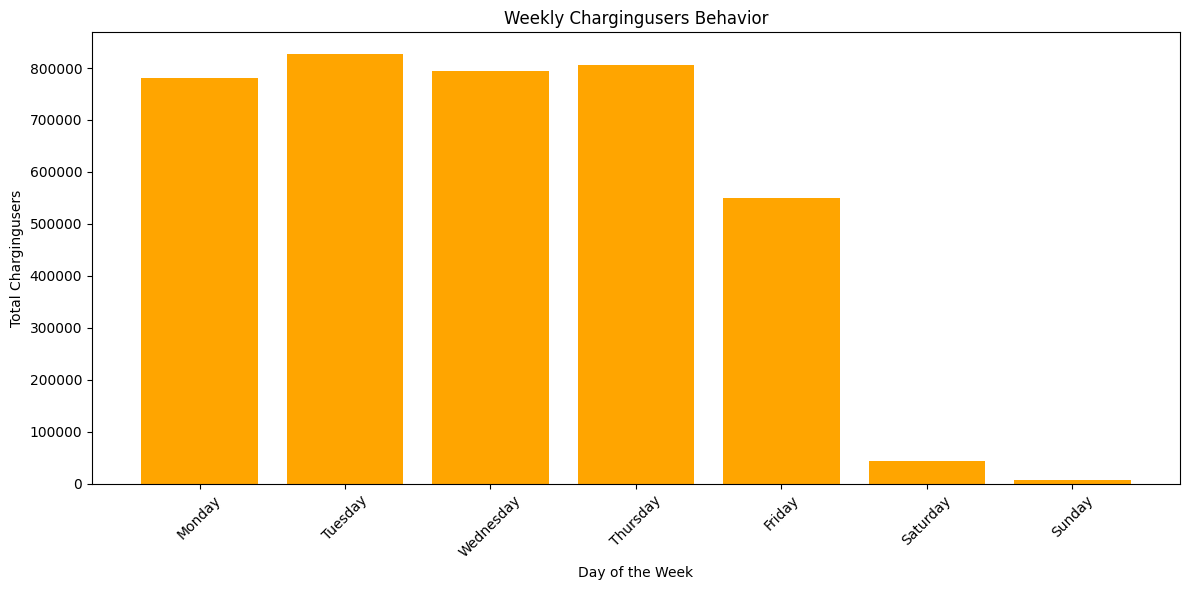

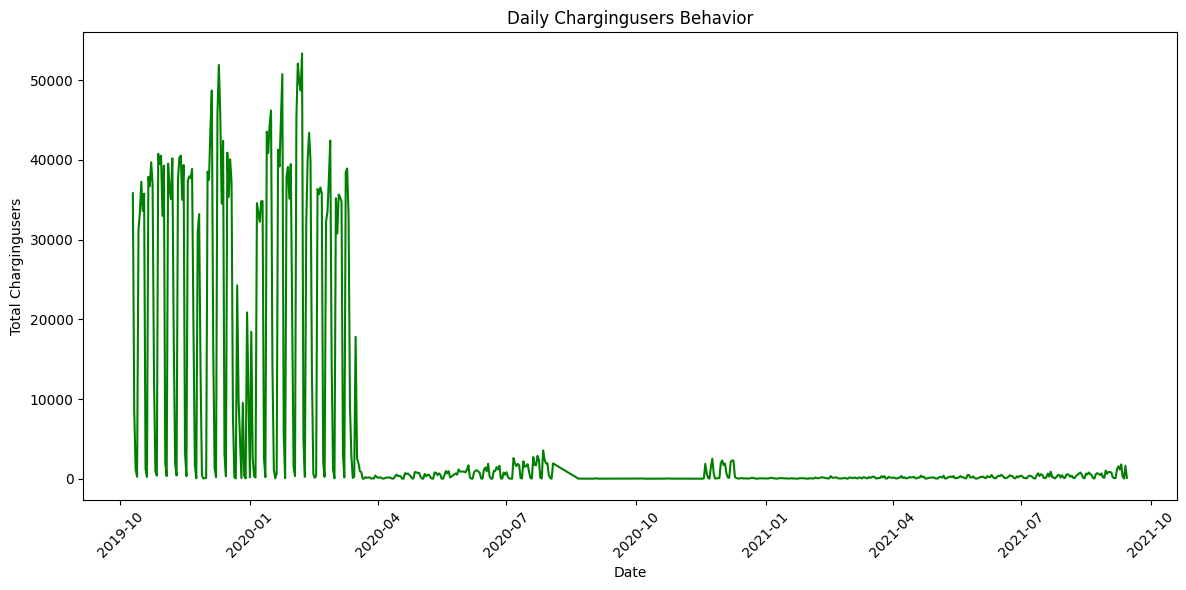

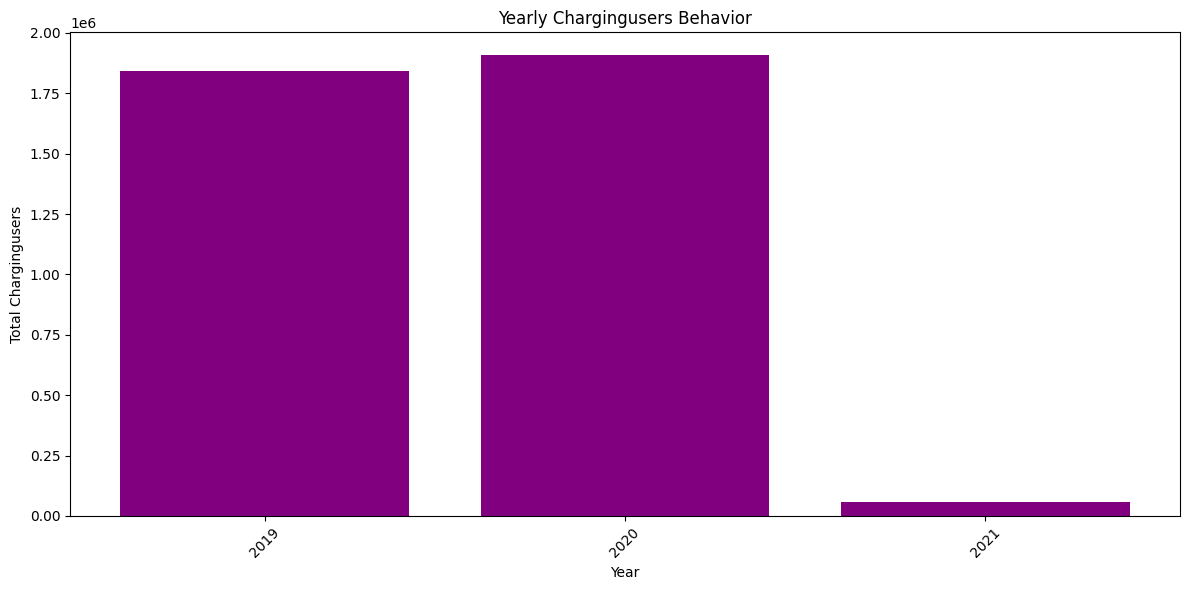

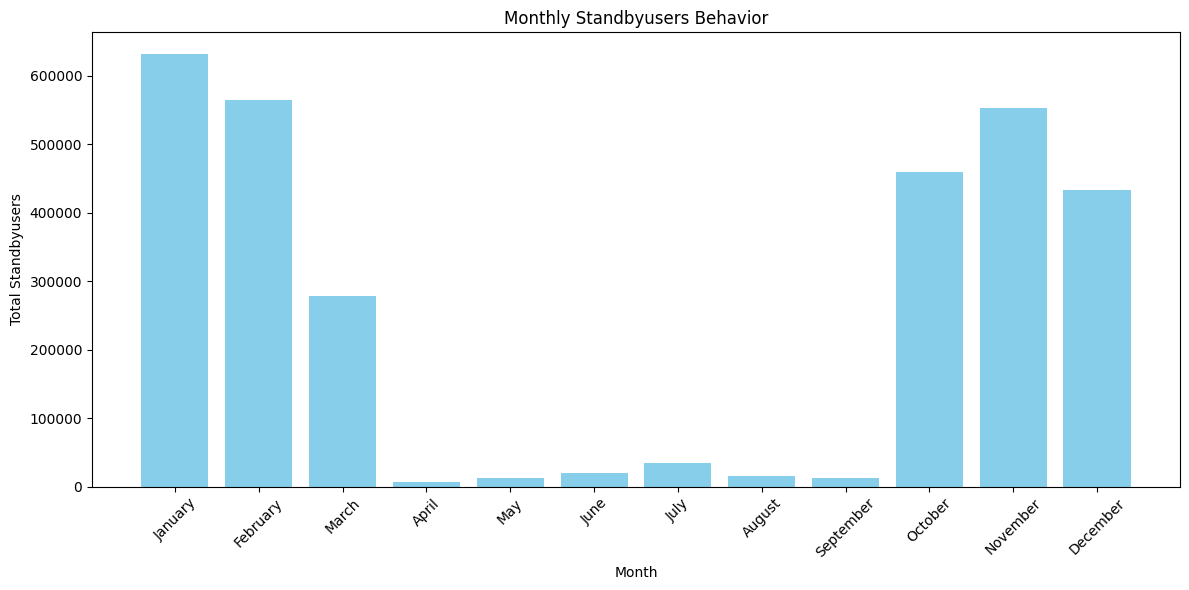

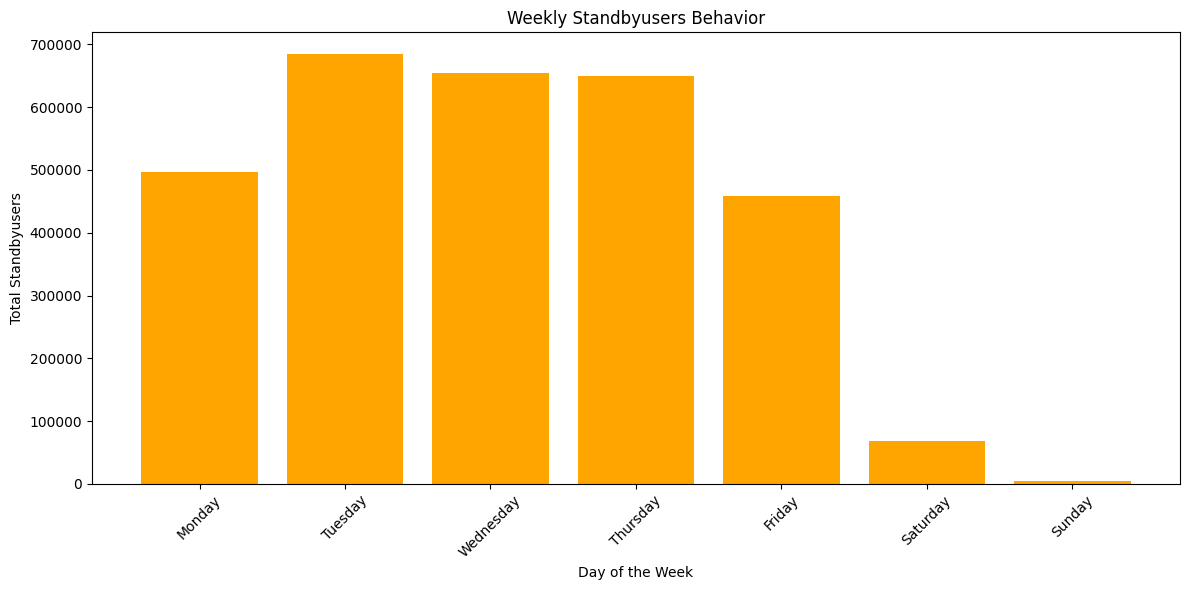

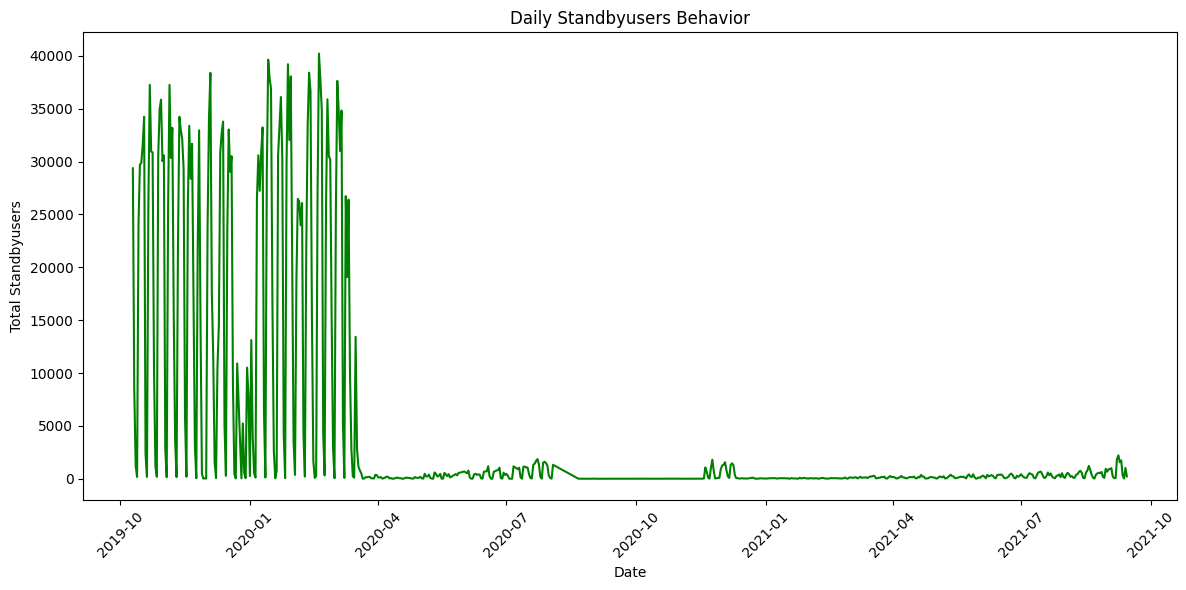

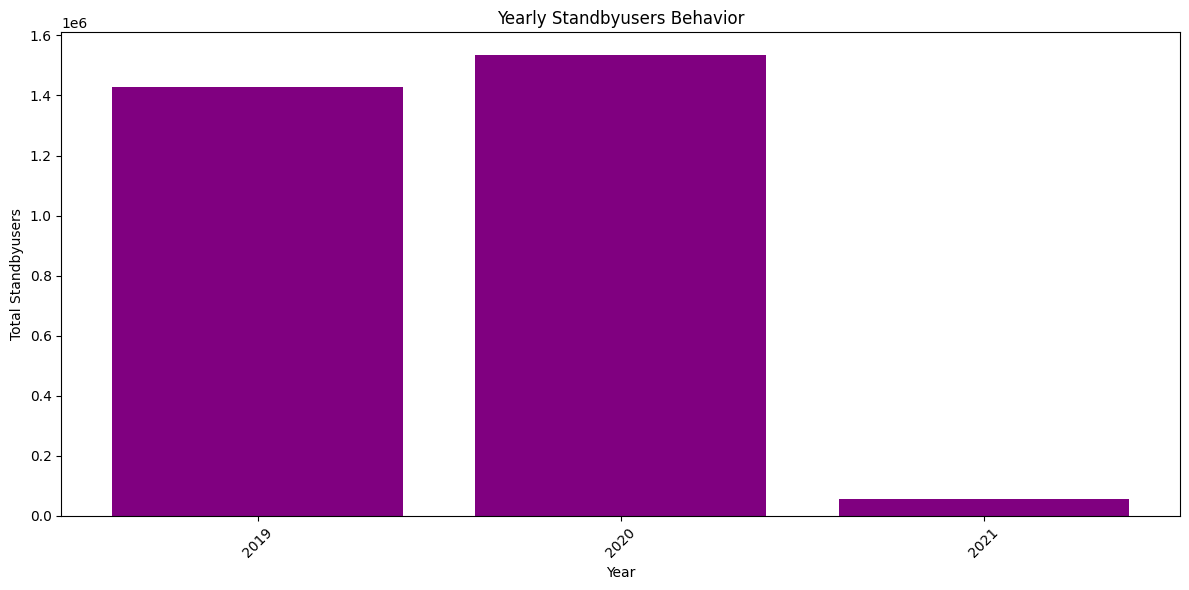

In [32]:
data = pd.read_csv("stationdata.csv")
preprocessed_data = StationData_utils.preprocess_data(data)
monthly_behavior, weekday_behavior, daily_behavior, yearly_behavior = StationData_utils.aggregate_behavior(preprocessed_data)

# Plot for 'chargingUsers'
StationData_utils.plot_behavior(monthly_behavior, weekday_behavior, daily_behavior, yearly_behavior, 'chargingUsers')

# Plot for 'standbyUsers'
StationData_utils.plot_behavior(monthly_behavior, weekday_behavior, daily_behavior, yearly_behavior, 'standbyUsers')


# How is daily, weekly, monthly and yearly Load Demand of EV charging?

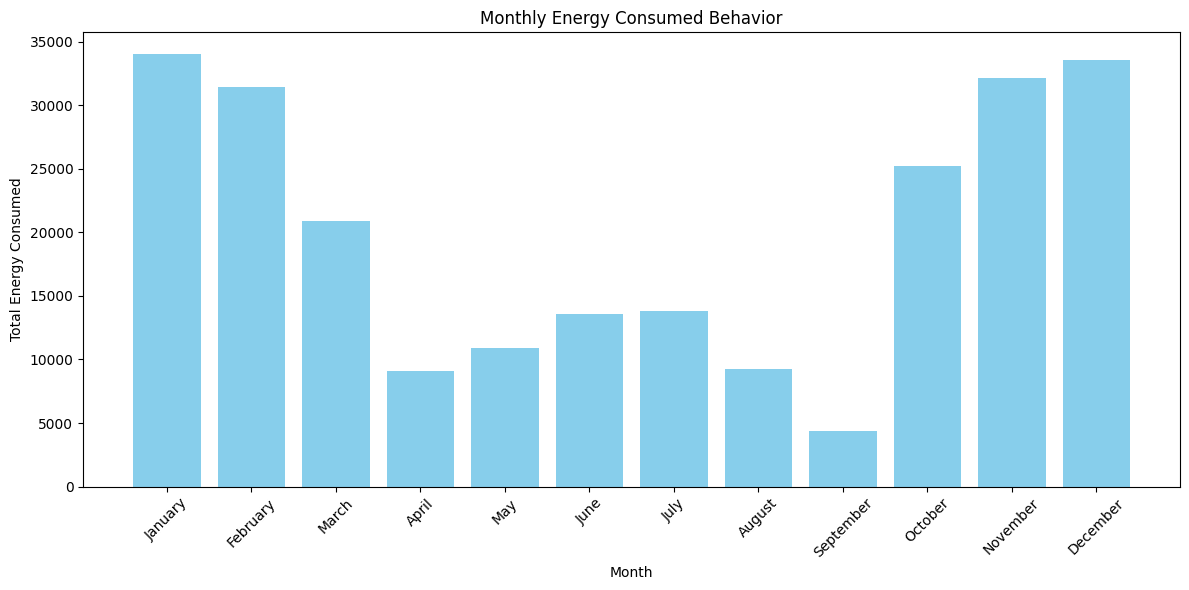

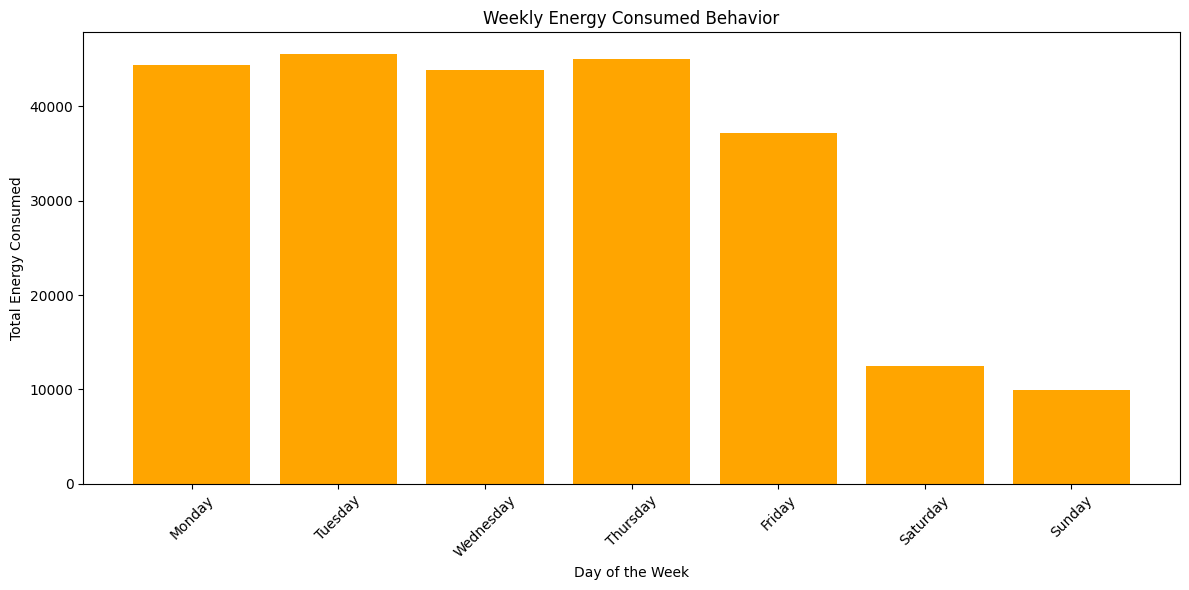

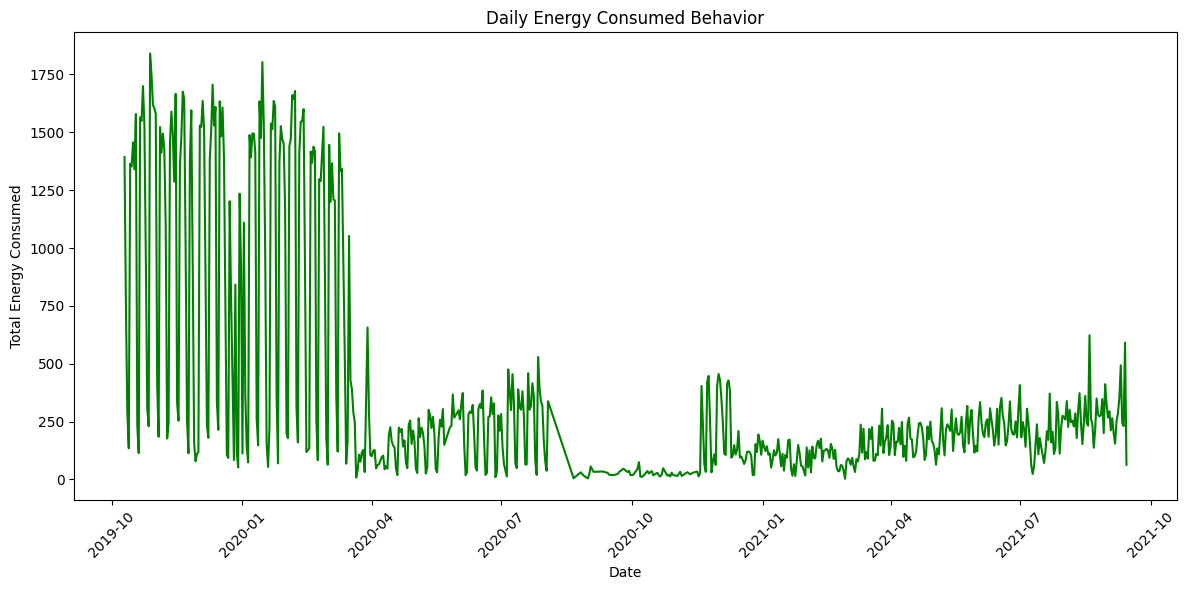

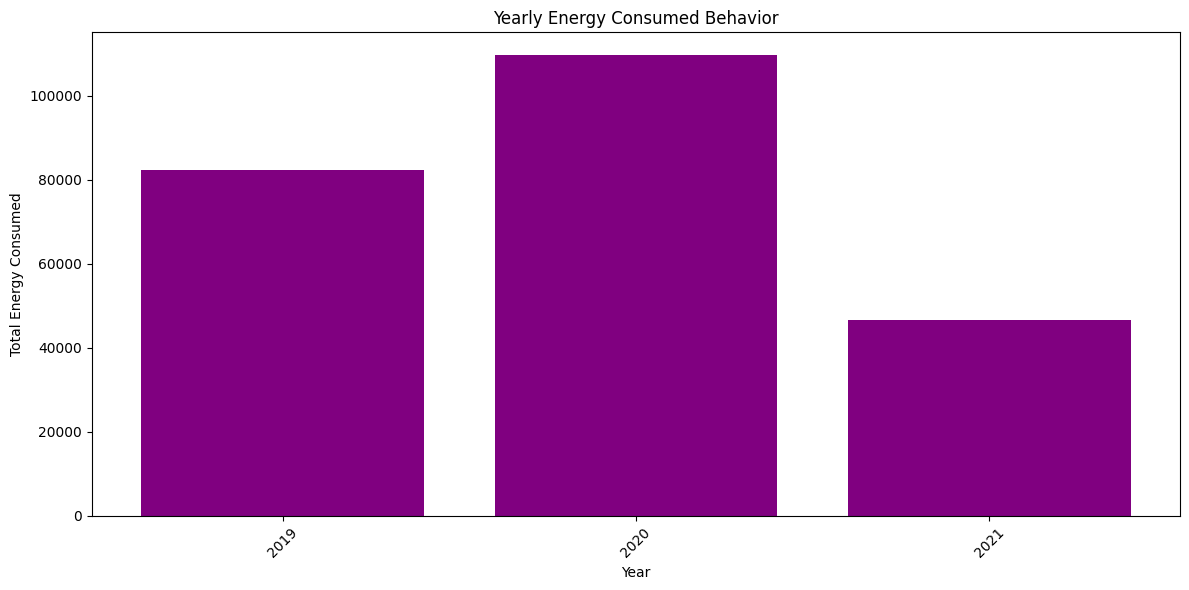

In [33]:
# Plot for 'Energy_Consumed'
StationData_utils.plot_behavior(monthly_behavior, weekday_behavior, daily_behavior, yearly_behavior, 'Energy_Consumed')

# What is the average duration of charging sessions, and how does it vary across different stations?

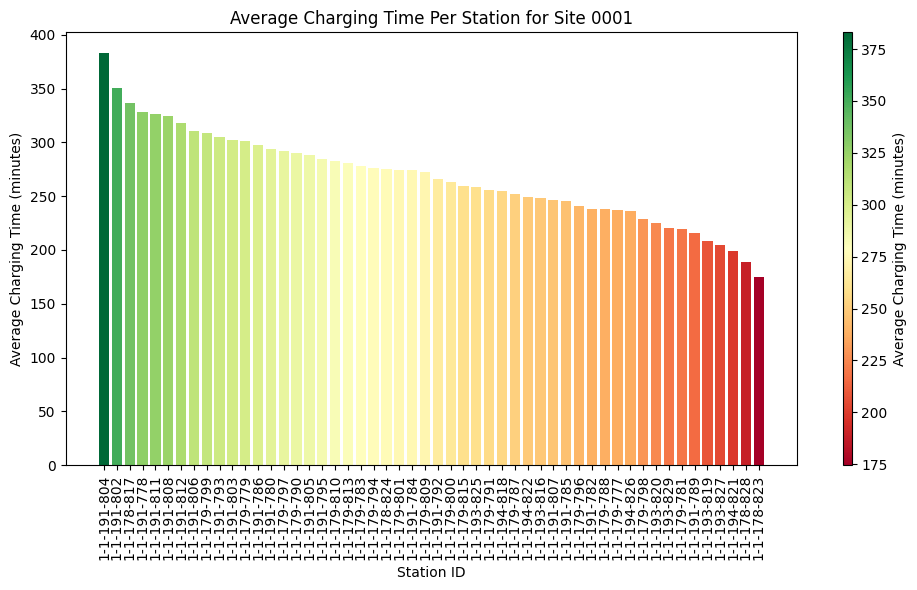

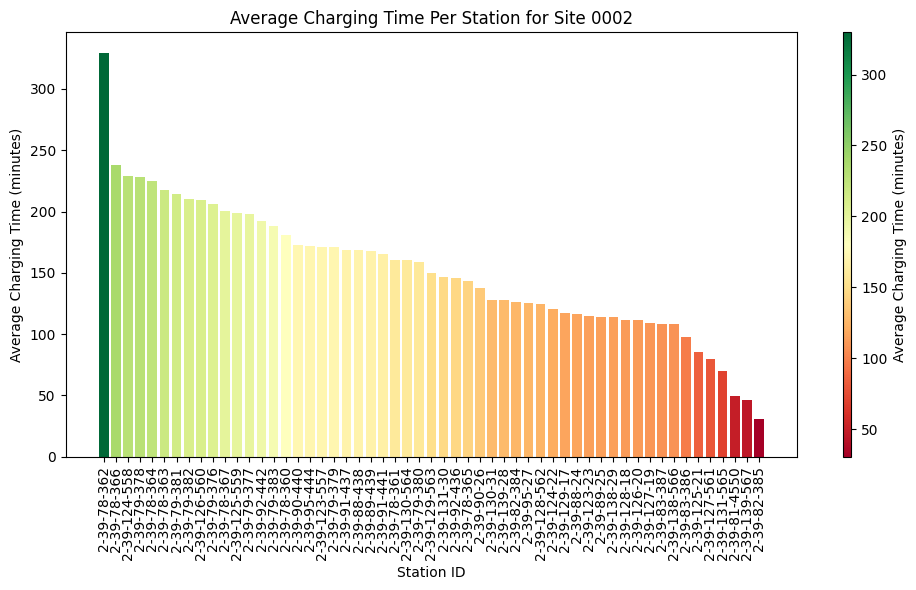

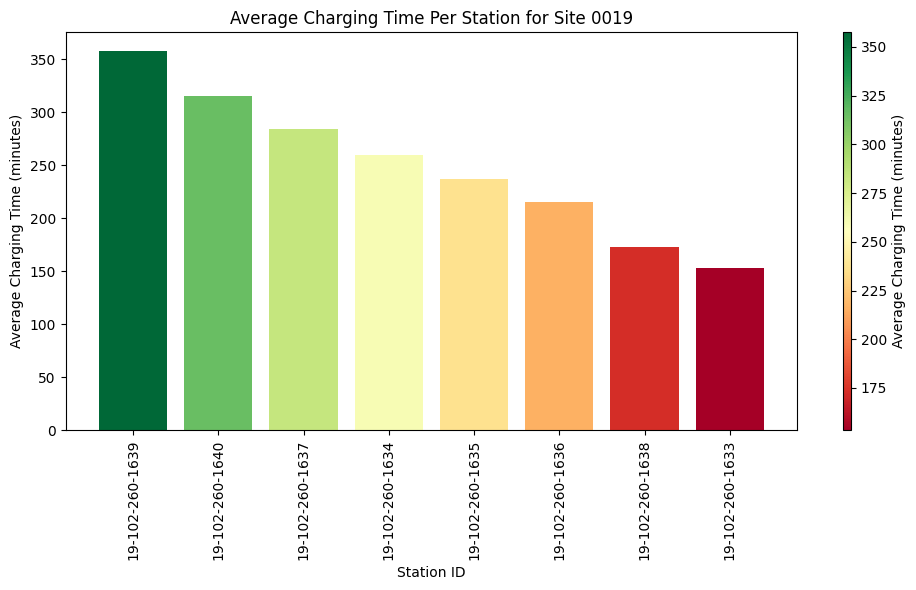

Average charging time across all sessions: 0 days 03:24:49.212992961

Average charging time per station:
stationID
1-1-178-817   0 days 05:36:53.064393939
1-1-178-823   0 days 02:54:32.327868852
1-1-178-824   0 days 04:35:40.140794223
1-1-178-828   0 days 03:09:12.136597938
1-1-179-777   0 days 03:57:07.842105263
                         ...           
2-39-91-441   0 days 02:45:18.376470588
2-39-92-436   0 days 02:25:37.145161290
2-39-92-442      0 days 03:12:28.400000
2-39-95-27    0 days 02:05:16.044117647
2-39-95-444   0 days 02:51:51.632352941
Name: chargingTime, Length: 115, dtype: timedelta64[ns]


In [34]:
avg_time, station_avg_time = acndata_utils.calculate_charging_time_statistics(df)
print("Average charging time across all sessions:", avg_time)
print("\nAverage charging time per station:")
print(station_avg_time)

# Optimization of user, station Data

In [36]:
acndata = pd.read_csv("acndata.csv")
stationdata = pd.read_csv("stationdata.csv")
electricity_pricing = pd.read_csv("Historical_Electricity_Pricing_2019_2021.csv")


## Preprocess and compute necessary fields

In [37]:
acndata, stationdata = Optimization_utils.preprocess_data(acndata, stationdata)
stationdata = Optimization_utils.calculate_power_new(stationdata, acndata)
acndata, stationdata = Optimization_utils.calculate_session_energy(acndata, stationdata)
acndata, stationdata = Optimization_utils.link_pricing_data(acndata, stationdata, electricity_pricing)


## Perform joint optimization

In [38]:
acndata, stationdata = Optimization_utils.fast_optimization(acndata, stationdata)

## Save results

In [39]:
acndata.to_csv('optimized_acndata.csv', index=False)
stationdata.to_csv('optimized_stationdata.csv', index=False)

# What percentage of connected time is actually spent charging, and how does this vary across stations?

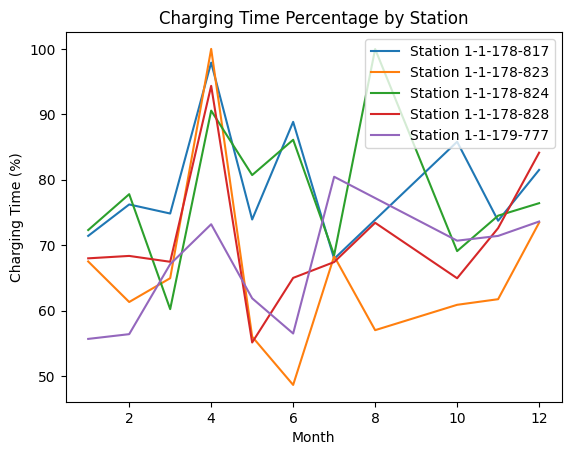

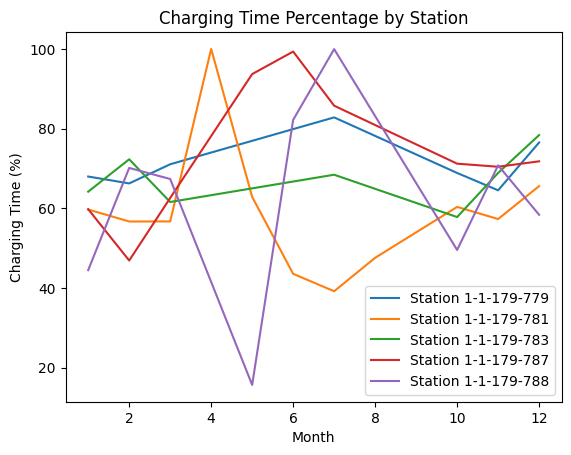

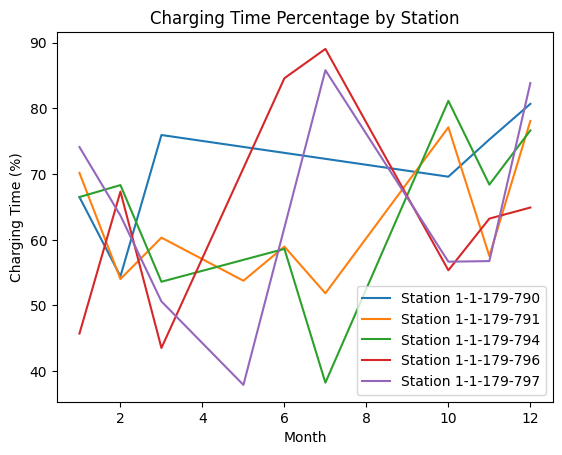

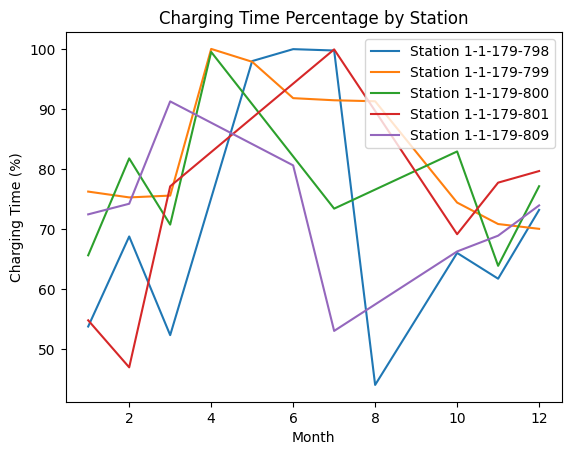

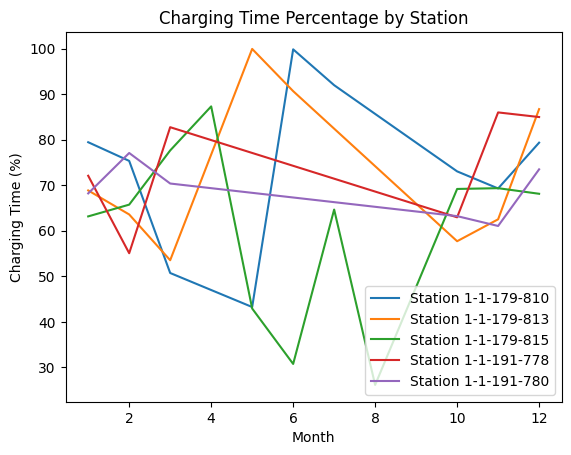

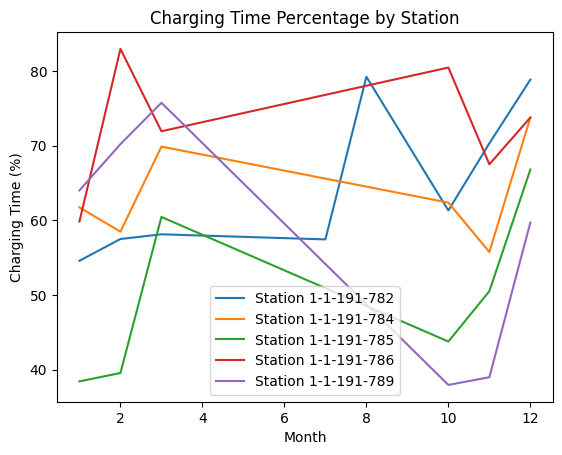

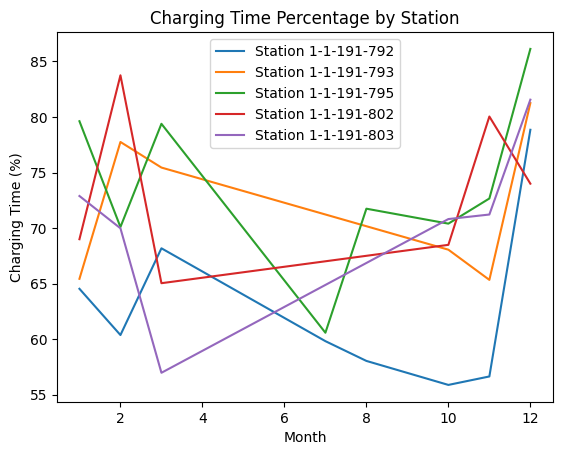

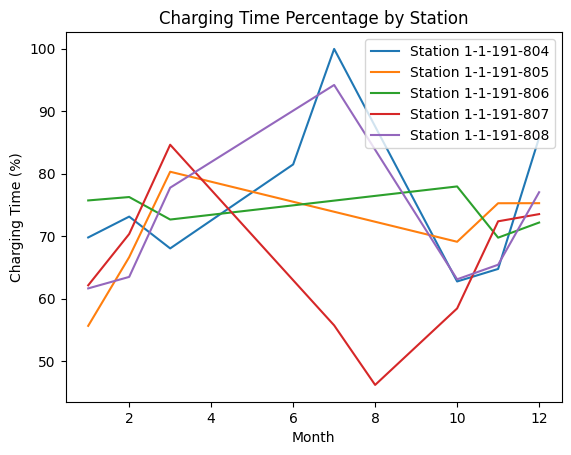

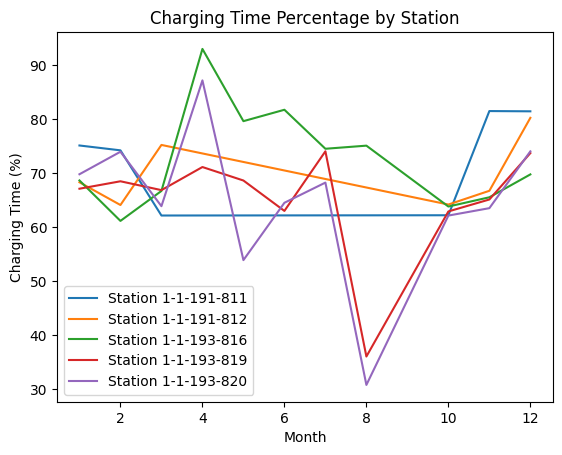

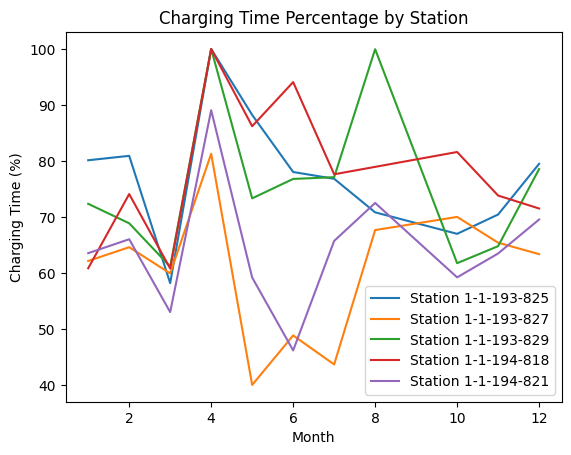

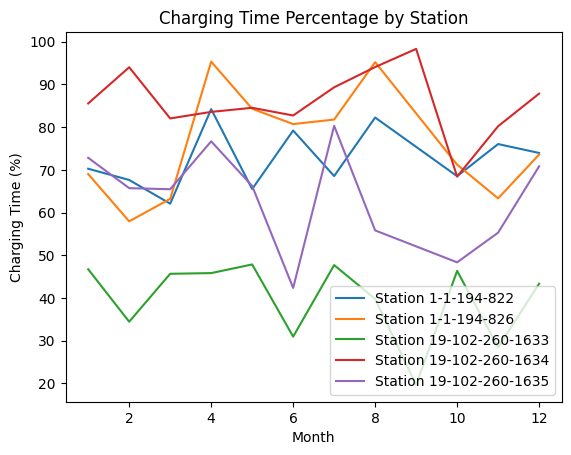

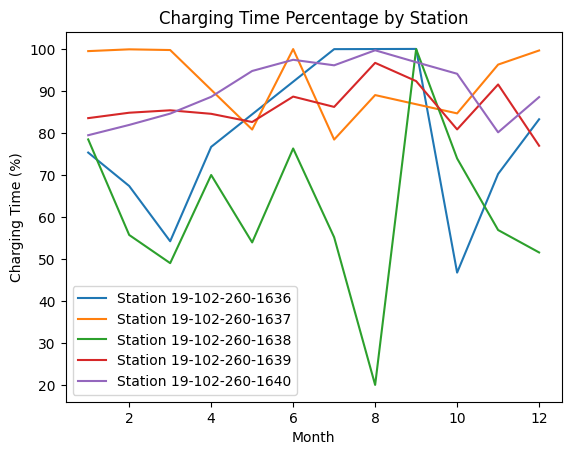

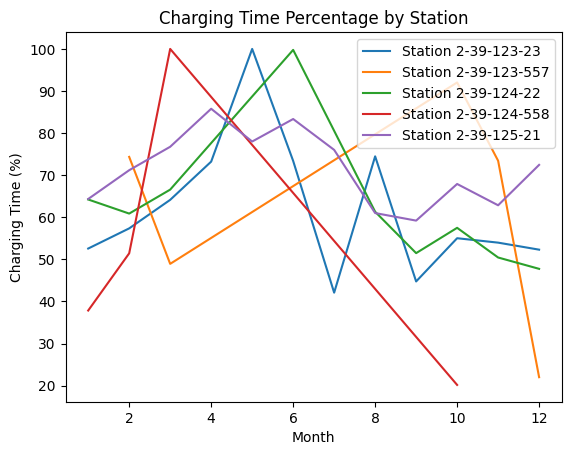

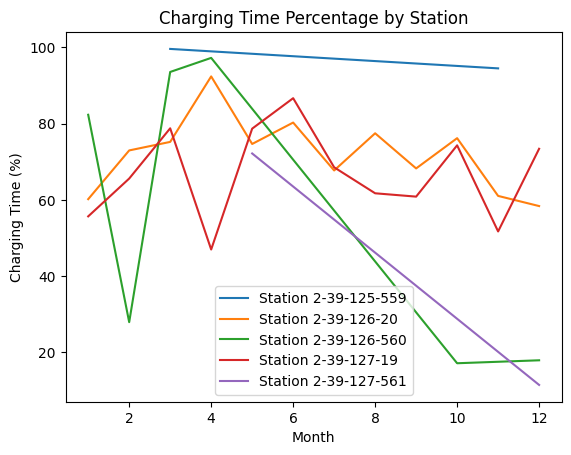

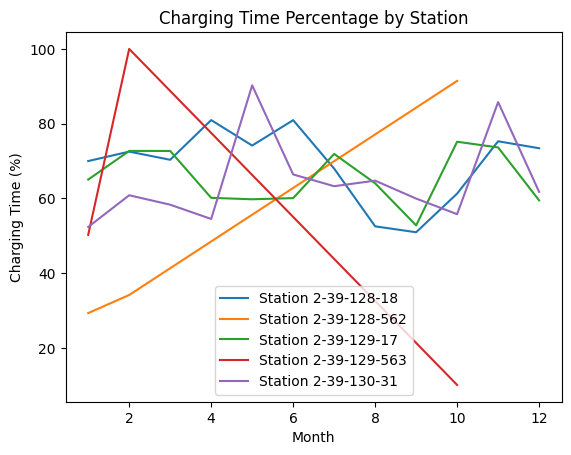

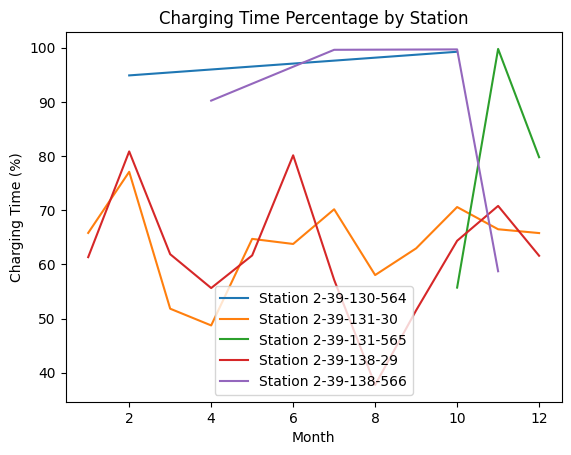

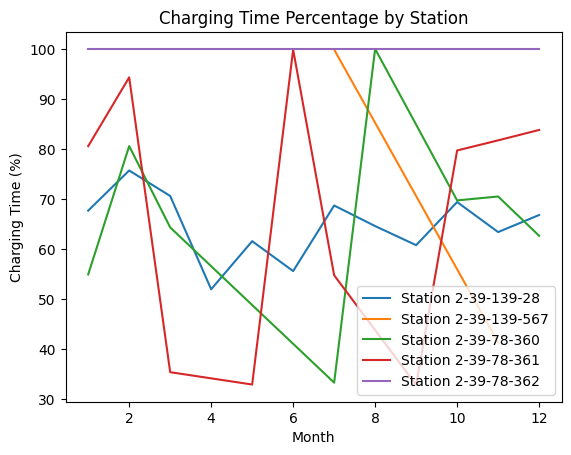

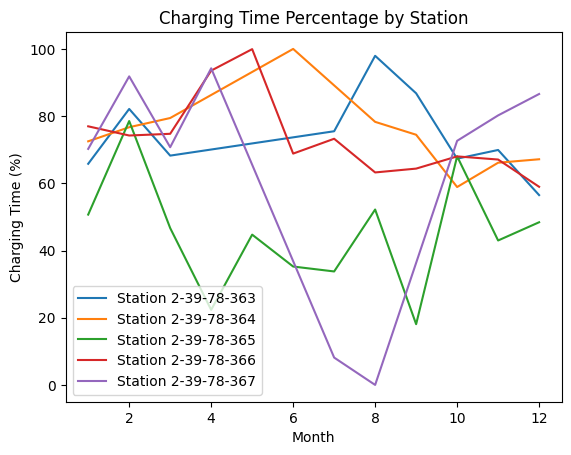

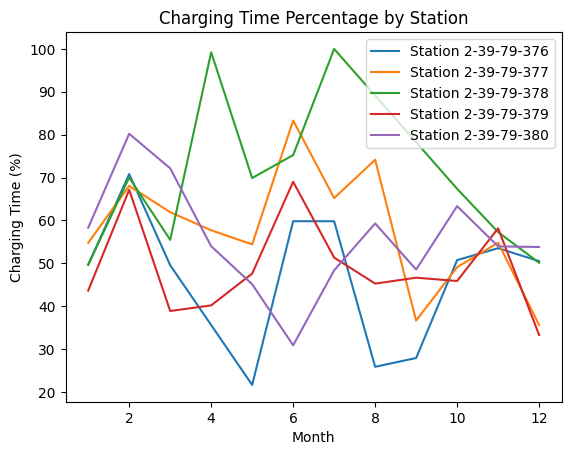

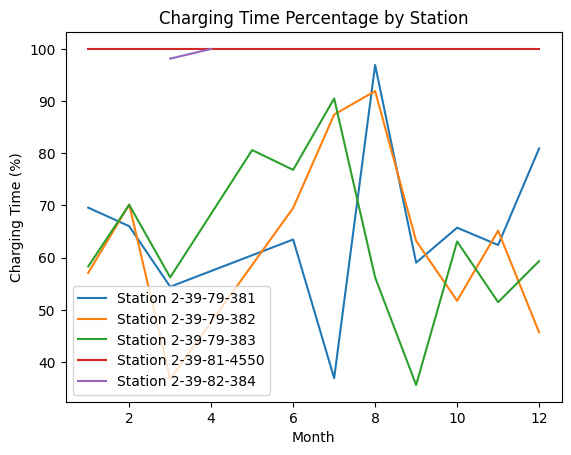

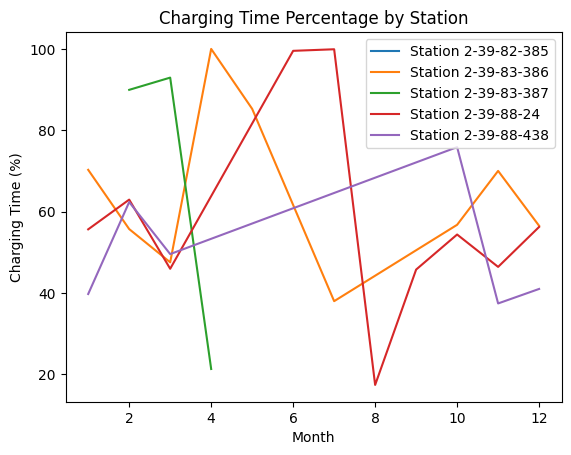

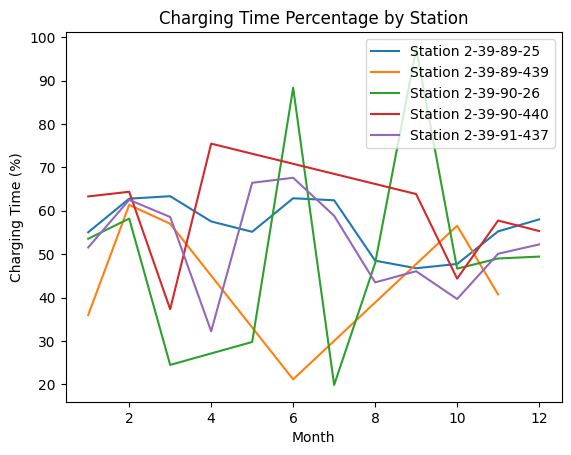

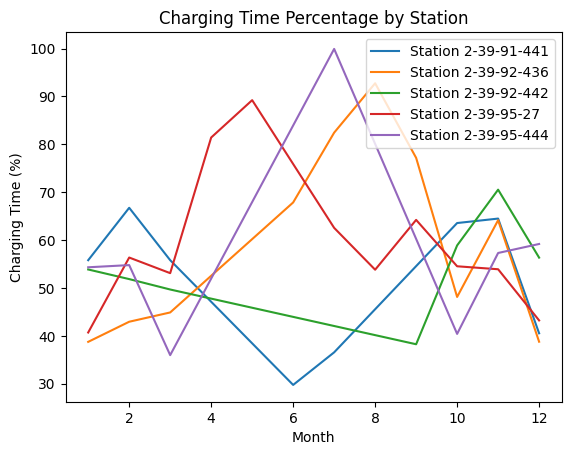

In [40]:
Optimization_utils.generate_charging_time_chart(acndata)

# How are the tariffs across different period of time?

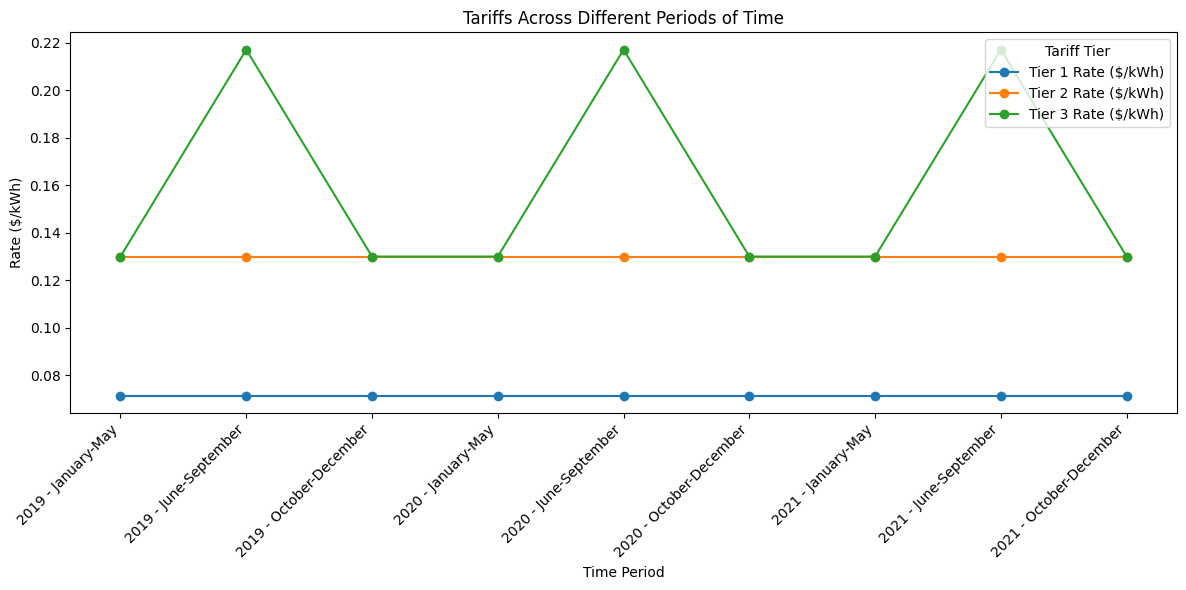

In [41]:
Optimization_utils.plot_tariffs_over_time(electricity_pricing)

## What is the potential impact on grid load if we shift a percentage of charging sessions from peak to off-peak hours, and how would this affect overall charging costs?

### Preprocess data

In [43]:
stationdata['session_start'] = pd.to_datetime(stationdata['session_start'])
stationdata['session_end'] = pd.to_datetime(stationdata['session_end'])
stationdata['Year'] = stationdata['session_start'].dt.year
stationdata['Season'] = stationdata['session_start'].dt.month.map({
        1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
        5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
    })

### Original load and cost

In [44]:
original_load, original_cost = Optimization_utils.calculate_grid_load_and_cost(stationdata, electricity_pricing)


Hourly Load (Sample):
hour
0    2.493384e+07
1    1.835804e+07
2    1.232078e+07
3    8.471093e+06
4    6.124219e+06
Name: Session_Energy, dtype: float64
Total Cost: $44352188.24


### Shift charging sessions

In [45]:
shifted_stationdata = Optimization_utils.shift_charging_sessions(stationdata, shift_percentage=30)


### Shifted load and cost

In [46]:
shifted_load, shifted_cost = Optimization_utils.calculate_grid_load_and_cost(shifted_stationdata,
                                                                                 electricity_pricing)

Hourly Load (Sample):
hour
0    2.493384e+07
1    1.835804e+07
2    2.142433e+07
3    1.806047e+07
4    1.542138e+07
Name: Session_Energy, dtype: float64
Total Cost: $44352188.24


### Plot results

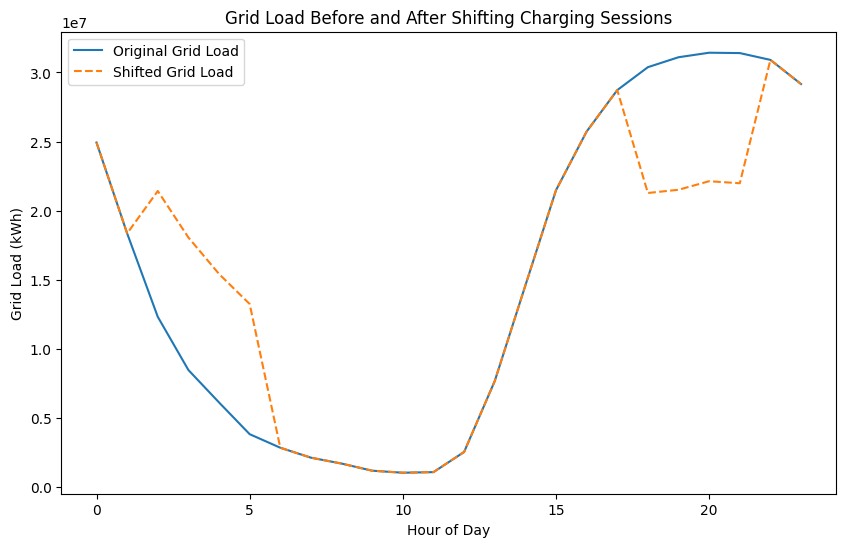

In [47]:
Optimization_utils.plot_comparison(original_load, shifted_load)